# Problem Statement - Part 1

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

* Which variables are significant in predicting the price of a house, and
* How well those variables describe the price of a house. 

Also, determine the optimal value of lambda for ridge and lasso regression.

Business Goal:

>You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [230]:
# Import required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, PowerTransformer

from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data:

In [231]:
# Reading the .csv file 
houses_df = pd.read_csv('train.csv')

In [232]:
# Taking a look at the top 5 records in the dataset
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [233]:
# Checking the shape of the data
houses_df.shape

(1460, 81)

As we have a 81 columns in the data and viewing all of them is important.

In [234]:
# Display all the columns and rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [235]:
# Checking the head in all the columns
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [236]:
#Checking the data info
houses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

>There are 1460 observations in the data and clearly, some columns have missing values.

In [237]:
# Checking the numerical columns
houses_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Data Preparation:

As there seemed to be columns that have null values, checking for null values:

In [238]:
# Checking null values
houses_df.columns[houses_df.isna().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [239]:
# Checking LotFrontage
houses_df.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [240]:
# Checking values
houses_df.LotFrontage.isna().value_counts()

False    1201
True      259
Name: LotFrontage, dtype: int64

>As the null value infers no Linear feet of street connected to property, imputing zero

In [241]:
houses_df.LotFrontage = houses_df.LotFrontage.fillna(0)

In [242]:
# Checking Alley
print(houses_df.Alley.isna().value_counts())
print(houses_df.Alley.value_counts())

True     1369
False      91
Name: Alley, dtype: int64
Grvl    50
Pave    41
Name: Alley, dtype: int64


>NA here means no alley access, imputing with the same

In [243]:
# Imputing full forms instead of abbrevations for better understanding
houses_df.Alley = houses_df.Alley.map({'Grvl':'Gravel','Pave':'Paved'})

houses_df.Alley = houses_df.Alley.fillna('No alley access')

In [244]:
#Checking MasVnrType
print(houses_df.MasVnrType.isna().value_counts())
print(houses_df.MasVnrType.value_counts())

False    1452
True        8
Name: MasVnrType, dtype: int64
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


>Since no value signifies Masonry veneer type "None", imputing with the same

In [245]:
houses_df.MasVnrType = houses_df.MasVnrType.fillna('None')

In [246]:
#Checking MasVnrArea
print(houses_df.MasVnrArea.value_counts())
print(houses_df.MasVnrArea.isna().value_counts())

0.0       861
180.0       8
72.0        8
108.0       8
120.0       7
16.0        7
200.0       6
340.0       6
106.0       6
80.0        6
132.0       5
320.0       5
360.0       5
84.0        5
170.0       5
220.0       4
336.0       4
183.0       4
252.0       4
196.0       4
300.0       4
268.0       4
40.0        4
168.0       4
100.0       4
270.0       4
210.0       4
76.0        4
288.0       4
216.0       4
160.0       4
178.0       4
246.0       4
456.0       4
74.0        3
70.0        3
50.0        3
44.0        3
272.0       3
226.0       3
104.0       3
116.0       3
90.0        3
145.0       3
148.0       3
42.0        3
110.0       3
128.0       3
85.0        3
136.0       3
420.0       3
186.0       3
256.0       3
166.0       3
350.0       3
130.0       3
99.0        3
176.0       3
174.0       3
208.0       3
312.0       3
169.0       3
240.0       3
82.0        3
289.0       2
232.0       2
95.0        2
18.0        2
338.0       2
298.0       2
236.0       2
206.0 

>Null value indicates no Masonry veneer area, as the column is numeric, imputing zero

In [247]:
houses_df.MasVnrArea = houses_df.MasVnrArea.fillna(0)

In [248]:
#Checking BsmtQual
print(houses_df.BsmtQual.value_counts())
print(houses_df.BsmtQual.isna().value_counts())

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
False    1423
True       37
Name: BsmtQual, dtype: int64


>As Null values indicate No basement, imputing the same

In [249]:
houses_df.BsmtQual = houses_df.BsmtQual.fillna('No Basement')

In [250]:
#Checking BsmtCond
print(houses_df.BsmtCond.value_counts())
print(houses_df.BsmtCond.isna().value_counts())

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
False    1423
True       37
Name: BsmtCond, dtype: int64


>As Null values indicate No basement, imputing the same

In [251]:
houses_df.BsmtCond = houses_df.BsmtCond.fillna('No Basement')

In [252]:
# Checking BsmtExposure
print(houses_df.BsmtExposure.value_counts())
print(houses_df.BsmtExposure.isna().value_counts())

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
False    1422
True       38
Name: BsmtExposure, dtype: int64


>As Null values indicate No basement, imputing the same

In [253]:
houses_df.BsmtExposure = houses_df.BsmtExposure.fillna('No Basement')

In [254]:
# Checking BsmtFinType1
print(houses_df.BsmtFinType1.value_counts())
print(houses_df.BsmtFinType1.isna().value_counts())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
False    1423
True       37
Name: BsmtFinType1, dtype: int64


>As Null values indicate No basement, imputing the same

In [255]:
houses_df.BsmtFinType1 = houses_df.BsmtFinType1.fillna('No Basement')

In [256]:
# Checking BsmtFinType2
print(houses_df.BsmtFinType2.value_counts())
print(houses_df.BsmtFinType2.isna().value_counts())

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
False    1422
True       38
Name: BsmtFinType2, dtype: int64


>As Null values indicate No basement, imputing the same

In [257]:
houses_df.BsmtFinType2 = houses_df.BsmtFinType2.fillna('No Basement')

In [258]:
# Checking Electrical
print(houses_df.Electrical.value_counts())
print(houses_df.Electrical.isna().value_counts())

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
False    1459
True        1
Name: Electrical, dtype: int64


>Imputing the null value with 'Standard Circuit Breakers & Romex' as it is the mode

In [259]:
houses_df.Electrical = houses_df.Electrical.fillna('SBrkr')

In [260]:
# Checking FireplaceQu
print(houses_df.FireplaceQu.value_counts())
print(houses_df.FireplaceQu.isna().value_counts())

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
False    770
True     690
Name: FireplaceQu, dtype: int64


In [261]:
# NA indicates no fireplace
houses_df.FireplaceQu = houses_df.FireplaceQu.fillna('No Fireplace')

In [262]:
# Checking GarageType
print(houses_df.GarageType.value_counts())
print(houses_df.GarageType.isna().value_counts())

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
False    1379
True       81
Name: GarageType, dtype: int64


In [263]:
# Imputing NA in GarageType, GarageFinish, GarageQual, GarageCond to No Garage as per Data dictionary
houses_df.GarageType = houses_df.GarageType.fillna('No Garage')
houses_df.GarageFinish = houses_df.GarageFinish.fillna('No Garage')
houses_df.GarageQual = houses_df.GarageQual.fillna('No Garage')
houses_df.GarageCond = houses_df.GarageCond.fillna('No Garage')

In [264]:
# Checking GarageYrBlt
print(houses_df.GarageYrBlt.value_counts())
print(houses_df.GarageYrBlt.isna().value_counts())

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
1977.0    35
1998.0    31
1999.0    30
1976.0    29
2008.0    29
2000.0    27
1968.0    26
2002.0    26
1950.0    24
1993.0    22
1958.0    21
1966.0    21
2009.0    21
1962.0    21
1965.0    21
1970.0    20
1996.0    20
1957.0    20
2001.0    20
1978.0    19
1954.0    19
1960.0    19
1997.0    19
1974.0    18
1964.0    18
1994.0    18
1995.0    18
1959.0    17
1956.0    16
1963.0    16
1990.0    16
1980.0    15
1979.0    15
1969.0    15
1967.0    15
1973.0    14
1988.0    14
1920.0    14
1972.0    14
1940.0    14
1992.0    13
1961.0    13
1971.0    13
1955.0    13
1953.0    12
1948.0    11
1987.0    11
1925.0    10
1985.0    10
1981.0    10
1989.0    10
1941.0    10
1975.0     9
1991.0     9
1939.0     9
1930.0     8
1984.0     8
1949.0     8
1983.0     7
1926.0     6
1986.0     6
1951.0     6
1936.0     5
1916.0     5
1922.0     5
1935.0     4
1946.0     4
1928.0     4
1931.0     4
1982.0     4
1945.0     4
1910.0     3

>As there are more observations that are null than the mode itself, instead of imputing with the mode, assigning zero as the year which represents 'Year Unknown'

In [265]:
# Imputing the null values with zero, where zero represents 'Unknown Year'
houses_df.GarageYrBlt = houses_df.GarageYrBlt.fillna(0)

In [266]:
# Checking PoolQC
print(houses_df.PoolQC.value_counts())
print(houses_df.PoolQC.isna().value_counts())

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64
True     1453
False       7
Name: PoolQC, dtype: int64


In [267]:
#From Data dictionary, Null values represent no pool
houses_df.PoolQC = houses_df.PoolQC.fillna('No Pool')

In [268]:
# Checking Fence
print(houses_df.Fence.value_counts())
print(houses_df.Fence.isna().value_counts())

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
True     1179
False     281
Name: Fence, dtype: int64


In [269]:
#From Data dictionary, Null values represent no fence
houses_df.Fence = houses_df.Fence.fillna('No Fence')

In [270]:
# Checking MiscFeature
print(houses_df.MiscFeature.value_counts())
print(houses_df.MiscFeature.isna().value_counts())

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64
True     1406
False      54
Name: MiscFeature, dtype: int64


In [271]:
#From Data dictionary, Null values in MiscFeature means 'None'
houses_df.MiscFeature = houses_df.MiscFeature.fillna('None')

Checking other columns

In [272]:
# MSZoning has a different name from the data dictionary, correcting it
houses_df.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [273]:
#Removing (all) from C
houses_df.MSZoning = houses_df.MSZoning.apply(lambda x: x.replace(' (all)', ''))

In [274]:
#Imputing the abbrevations with the original values for better representation
houses_df.MSZoning = houses_df.MSZoning.map({
    'A':'Agriculture','C':'Commercial','FV':'Floating Village','I':'Industrial','RH':'Residential High Density',
    'RL':'Residential Low Density','RP':'Residential Low Density Park','RM':'Residential Medium Density'
})

Checking if there is dominance of a particular value in the data

In [275]:
# Initialise a list to store the column names
dominant_columns=[]

for column in houses_df.columns:
    # For each column in the data, get the value with maximum occurance
    count = houses_df[column].value_counts()
    count_max = count.iloc[0]
    
    # Check if the value is too dominant and add to the created list, here the threshold is 98%
    if count_max / len(houses_df) * 100 > 98:
        dominant_columns.append(column)

>If more than 98% of the values are same in a column, it is not useful for the prediction

In [276]:
# Removing the dominant columns
houses_df.drop(dominant_columns,axis=1,inplace=True)

# Dropping the ID column as it is unrelated to the prediction
houses_df = houses_df.drop(columns='Id', axis=1)

>Columns like MSSubClass, OverallQual, OverallCond have dummies in-place of the original vallues

In [277]:
#Imputing with the original values for better inference
houses_df.MSSubClass = houses_df.MSSubClass.map({20:'1-STORY 1946 & NEWER ALL STYLES',
                                                   30:'1-STORY 1945 & OLDER',
                                                   40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                                   45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                                   50:'1-1/2 STORY FINISHED ALL AGES',
                                                   60:'2-STORY 1946 & NEWER',
                                                   70:'2-STORY 1945 & OLDER',
                                                   75:'2-1/2 STORY ALL AGES',
                                                   80:'SPLIT OR MULTI-LEVEL',
                                                   85:'SPLIT FOYER',
                                                   90:'DUPLEX - ALL STYLES AND AGES',
                                                   120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                                   150:'1-1/2 STORY PUD - ALL AGES',
                                                   160:'2-STORY PUD - 1946 & NEWER',
                                                   180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                                   190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

houses_df.OverallQual = houses_df.OverallQual.map({
    1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',
    6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent',
})

houses_df.OverallCond = houses_df.OverallCond.map({
    1:'Very Poor',2:'Poor',3:'Fair',4:'Below Average',5:'Average',
    6:'Above Average',7:'Good',8:'Very Good',9:'Excellent',10:'Very Excellent',
})

In [278]:
# Checking the shape of the data
houses_df.shape

(1460, 72)

In [279]:
#Checking the columns
houses_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'Fence'

## EDA - Univariate Analysis:

Categorical Variables:

In [280]:
# Analysing the type of dwelling involved in the sale.
houses_df['MSSubClass'].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: MSSubClass, dtype: int64

> Among all the houses, most of them belonged to "1-STORY 1946 & NEWER ALL STYLES" and "2-STORY 1946 & NEWER" subclass

In [281]:
# Analysing general zoning classification
houses_df['MSZoning'].value_counts()

Residential Low Density       1151
Residential Medium Density     218
Floating Village                65
Residential High Density        16
Commercial                      10
Name: MSZoning, dtype: int64

>Most of the houses are in "Residential Low Density" zone and too low in "Residential High Density" and "Commercial" zones.

In [282]:
# Analysing the linear feet of street connected to property
houses_df['LotFrontage'].describe()

count    1460.000000
mean       57.623288
std        34.664304
min         0.000000
25%        42.000000
50%        63.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

>The average Linear feet of street connected to property is around 57.6 ft

In [283]:
# Analysing the Lot size
houses_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

>The average Lot Size is around 10517 sq.ft, where the minimum size is 1300 sq.ft and the maximum size is 215245 sq.ft

In [284]:
# Analysing Type of alley access to property
houses_df['Alley'].value_counts()

No alley access    1369
Gravel               50
Paved                41
Name: Alley, dtype: int64

>Majority(>90%) of the houses have no alley access.

In [285]:
# Analysing generl shape of the property
houses_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

>Most of the houses have regular shape, and some of them are slightly irregular. Very less properties are moderately/completely irregular. 

In [286]:
# Analysing Flatness of the property
houses_df['LandContour'].value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

>Majority of the properties are Near Level/flat. 

In [287]:
# Analysing Lot configuration
houses_df['LotConfig'].value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

>Majority of the properties are inside lot, some of them are corner lot.

In [288]:
# Analysing Slope of property
houses_df['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

>Most of the properties are in gentle slope. Very little percentage of the properties are with severe slope

In [289]:
# Analysing Physical locations within Ames city limits
houses_df['Neighborhood'].value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

>North Ames and College Creek locations have more properties compared to other locations within Ames city.

In [290]:
# Analysing Proximity to various conditions
houses_df['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

>Majority(~90%) of the properties are with Normal proximity. Very few are in proximity with 200' of East-West Railroad or Adjacent to East-West Railroad

In [291]:
# Analysing Type of dwelling
houses_df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

>Most of the houses are Single-family detached type

In [292]:
# Analysing Style of dwelling
houses_df['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

>Most of the houses are of One story and Two story style, while we can find very less houses with Two and one-half story: 2nd level finished style

In [293]:
# Analysing overall material and finish of the house (Rating)
houses_df['OverallQual'].value_counts()

Average           397
Above Average     374
Good              319
Very Good         168
Below Average     116
Excellent          43
Fair               20
Very Excellent     18
Poor                3
Very Poor           2
Name: OverallQual, dtype: int64

> Around 70% of the houses are Average, above the average and Good Quality, less than 0.5% of the properties are in poor or verypoor Quality.

In [294]:
# Analysing overall condition of the house (Rating)
houses_df['OverallCond'].value_counts()

Average          821
Above Average    252
Good             205
Very Good         72
Below Average     57
Fair              25
Excellent         22
Poor               5
Very Poor          1
Name: OverallCond, dtype: int64

>Majority of the houses are average , most of them are above average and good.

In [295]:
# Analysing Type of roof
houses_df['RoofStyle'].value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

>Gable type are used most for the roofs, Flat, Gambrel, Mansard and Shed type of roofs can't be found in most of the houses

In [296]:
# Analysing Exterior covering on house
houses_df['Exterior1st'].value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

>Around 40% of the houses have Vinyl Siding as their Exterior covering.

In [297]:
# Analysing quality of the material on the exterior 
houses_df['ExterQual'].value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

>Typically average quality of exterior can be found in most of the houses and some of the houses have Good exterior quality too

In [298]:
# Analysing present condition of the material on the exterior
houses_df['ExterCond'].value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

>Majority of the houses have typically average exterior condition at present

In [299]:
# Analysing Type of foundation
houses_df['Foundation'].value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

>Poured Contrete and Cinder Block type of foundation were used in the majority of the houses

In [300]:
# Analysing height of the basement
houses_df['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

>Majority of the houses have height of basement between 80-99 inches

In [301]:
# Analysing height of the basement
houses_df['CentralAir'].value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

>Around 95% of the houses have Central Air conditioning

In [302]:
# Analysing Condition of sale
houses_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

>Most of the sales happenned in Normal sale condition, very less due to Sale between family members or Allocation - two linked properties with separate deeds, typically condo with a garage unit or Adjoining Land Purchase

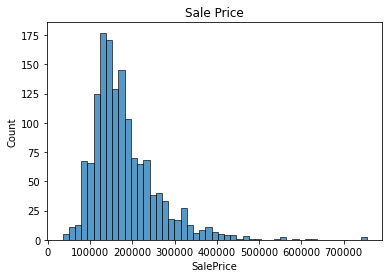

In [303]:
# Analysing SalePrice

# Histogram for the Sale Price 
sns.histplot(data=houses_df.SalePrice)
plt.title('Sale Price')
plt.show()

>Most sales happened between 120K to 175k and the number of sales are decreasing as the price increases.

## EDA-Bivariate Analysis:

Analysing the numerical columns against Sale Price

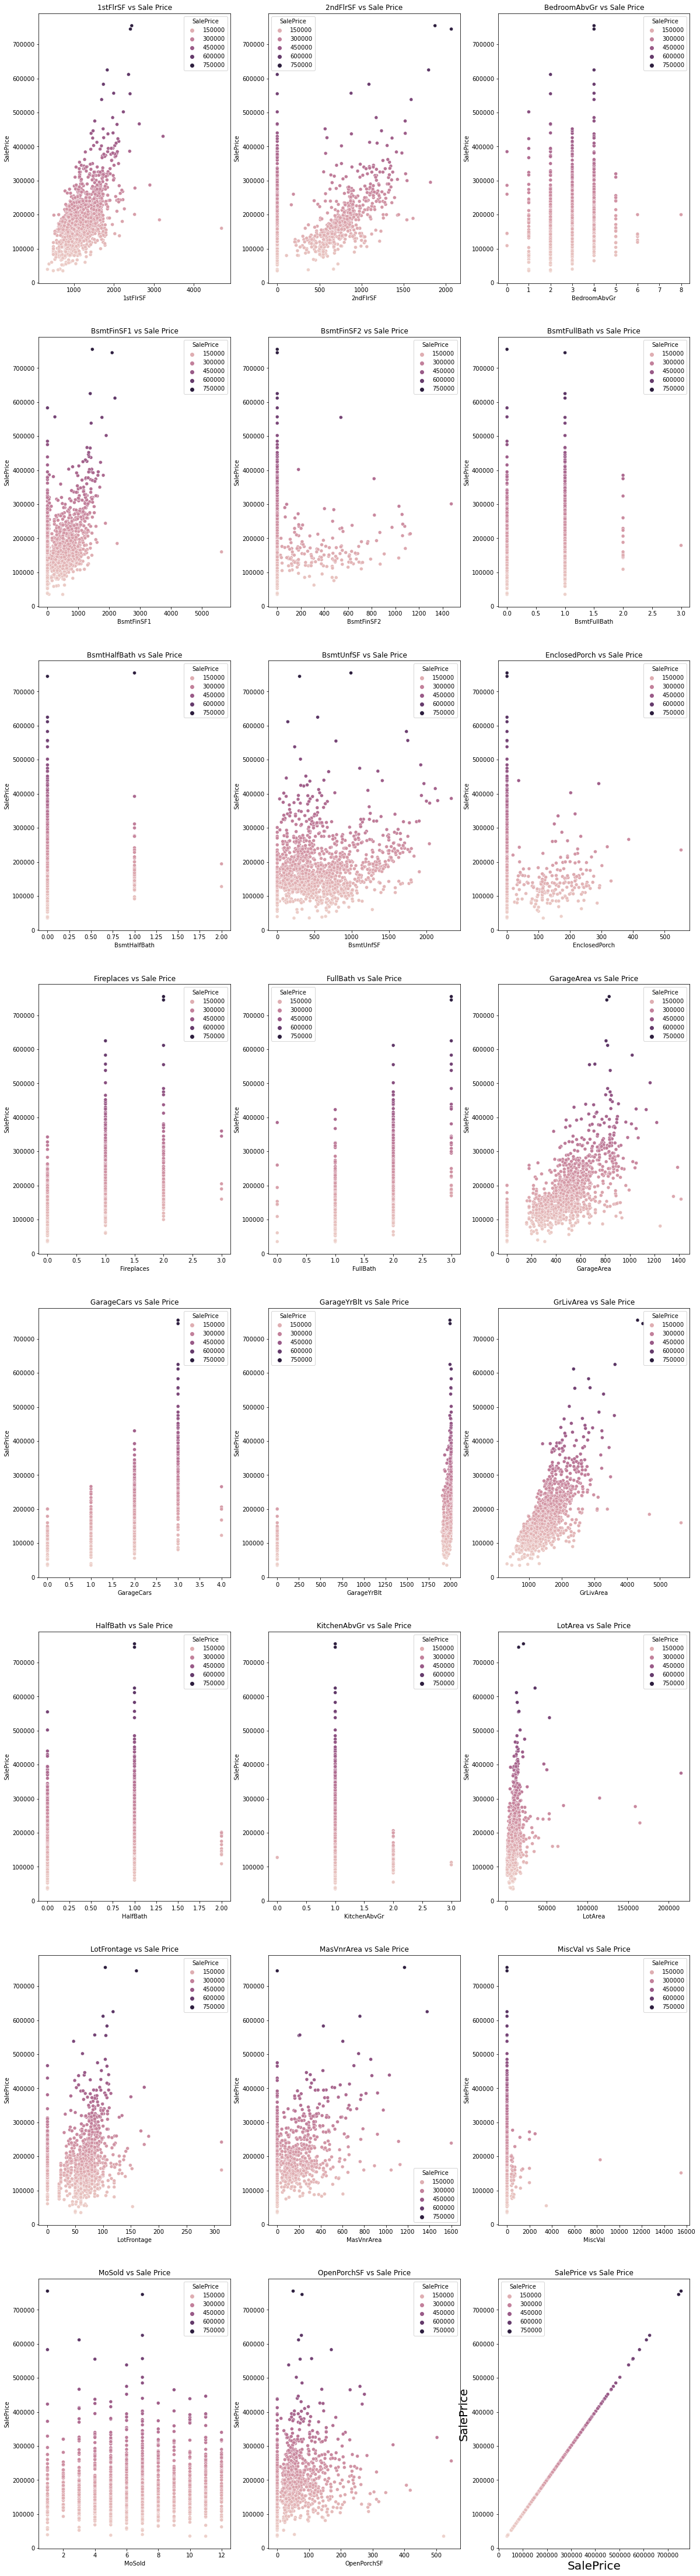

In [304]:
# Considering only the numeric features
num_var = houses_df.select_dtypes(include=['int64','float64'])

 # plotting scatter plot for each numeric column against Sale Price
fig, axs= plt.subplots(8,3,figsize=(20,80))
for x, ax in zip(sorted(num_var.columns), axs.flatten()):
    
    sns.scatterplot(hue='SalePrice', x=x, y='SalePrice', data=num_var, ax=ax)
    plt.xlabel(x,fontsize=20)
    plt.ylabel('SalePrice',fontsize=20)
    ax.set_title(f'{x} vs Sale Price')

<b> Important Observations:
>1. Most of the columns seem to be on a linear relationship with the Sale Price.
>2. Visibly, there are no patterns observed except for the linearity.
>3. Properties sold in the first half of the year had slightly high SalePrice compared to that of the second half of the year
>4. Houses with one half batch has relatively high Sale Price than the ones with no half baths or even two half baths
>5. As the Garage size increases upto the capacity of 3 cars, the Sale Price exponentially increases with the garage of 3 car capacity fetching the highest SalePrice
>6. Number of full Baths is also positively correlated with the sale Price
>7. Houses with 2 fireplaces have the highest sale price
>8. 1 full bathroom in basement yielded higher SalePrice than 2 full bathrooms in basement

Analysing the categorical variables against SalePrice

In [305]:
# Considering only the categorical features
cat_var = houses_df.select_dtypes(include=['object'])

#categorical feature columns vs SalePrice
def box_plot(x_col, y_col, **kwargs):
    sns.boxplot(x=x_col, y=y_col)
    x=plt.xticks(rotation=0)

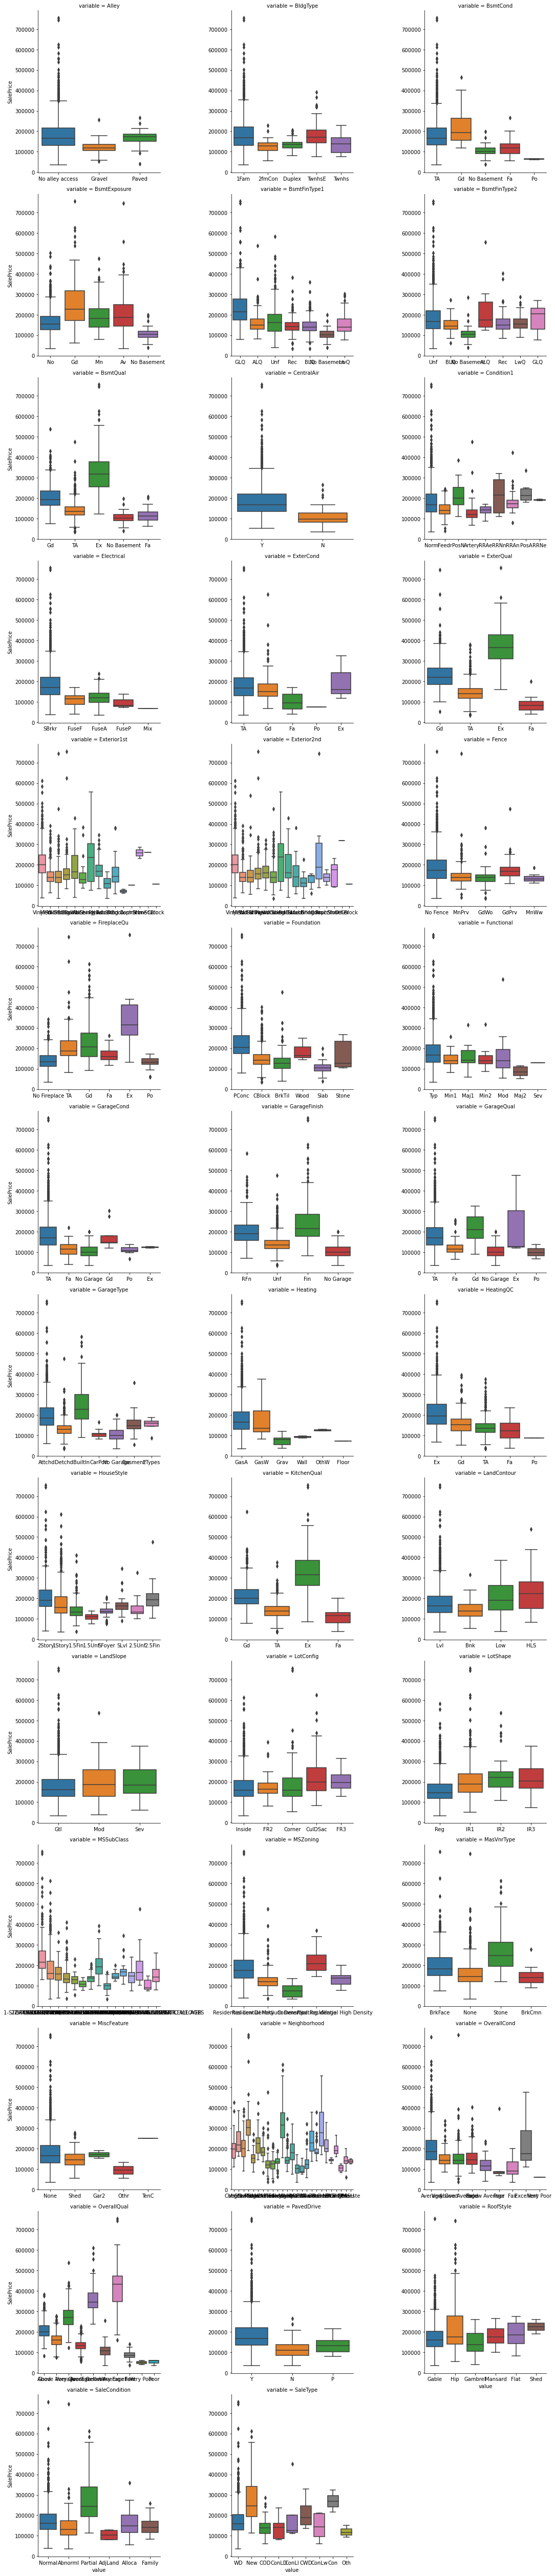

In [306]:
#Plotting the features after unpivoting
cols = pd.melt(houses_df, id_vars=['SalePrice'], value_vars=sorted(houses_df[cat_var.columns]))
grid = sns.FacetGrid(cols, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
grid = grid.map(box_plot, "value", "SalePrice")

Important Observations:
>1. Houses with No alley access have significantly more SalePrice compared to Gravel or Paved, Houses with Paved Alleys and No alley access have the same median Saleprice approximately.
>2. Single-family Detached dwelling has more Sale Price, Single-family Detached and Townhouse End Unit approximately have the same median SalePrice, whereas all the other types slightly lower median than Townhouse End Unit.
>3. Good Basement condition attracts more Sale Price with a median price around 200K, Houses with no basement, fair and poor types have too low SalePrice.
>4. Houses with Good exposure have elatively good SalePrice compared to minimum or average exposure.
>5. Houses with 100+ inches height of basement attracted significantly high SalePrice, around twice as that of the 90-99 inches basements. Less than 80 inches gave two low SalePrices.
>6. Properties with Central Air conditioning have had higher SalePrices, where the ones with no central air conditioning had maximum prices less than the median Price of the other.
>7. Excellent Exterior material quality yielded significantly high SalePrices, the median being almost equal to that of the  maximum Price of the Good Quality ones.
>8. Houses with Good Privacy fencing have higher median SalePrice compared to the other fence types.
>9. No Fireplace has given better SaleProce than a Poor FirePlace. Excellent fireplace quality gives too high SalePrices, where the maximum salePrice lies above 400K and the median above 300K.
>10. Houses with Average Garage condition have better SalePrice than others. No Garage attracted lower median SalePrice than that of a Poor Garage.
>11. Built in garages gave higher SalePrice, followed by Attached to home garages.
>12. Excellent kitchen quality yielded too high SalePrices, followed by good, average and poor kitchen types.
>13. Hillside house with significant slope from side to side gave higher SalePrices followed by Depression type, near flat type and banked type.
>14. Houses with Stone type masonry veneer tend to sell at higher Pries
>15. Houses having Paved driveway or a partial paved driveway tend to sell higher
>16. Partially completed houses sold at a higher price than all other type of houses.
>17. Home that was just costructed and sold have had higher SalePrice than most others. Sale type of Contract 15% Down payment regular terms has the highest median SalePrice.

Checking for correlation:

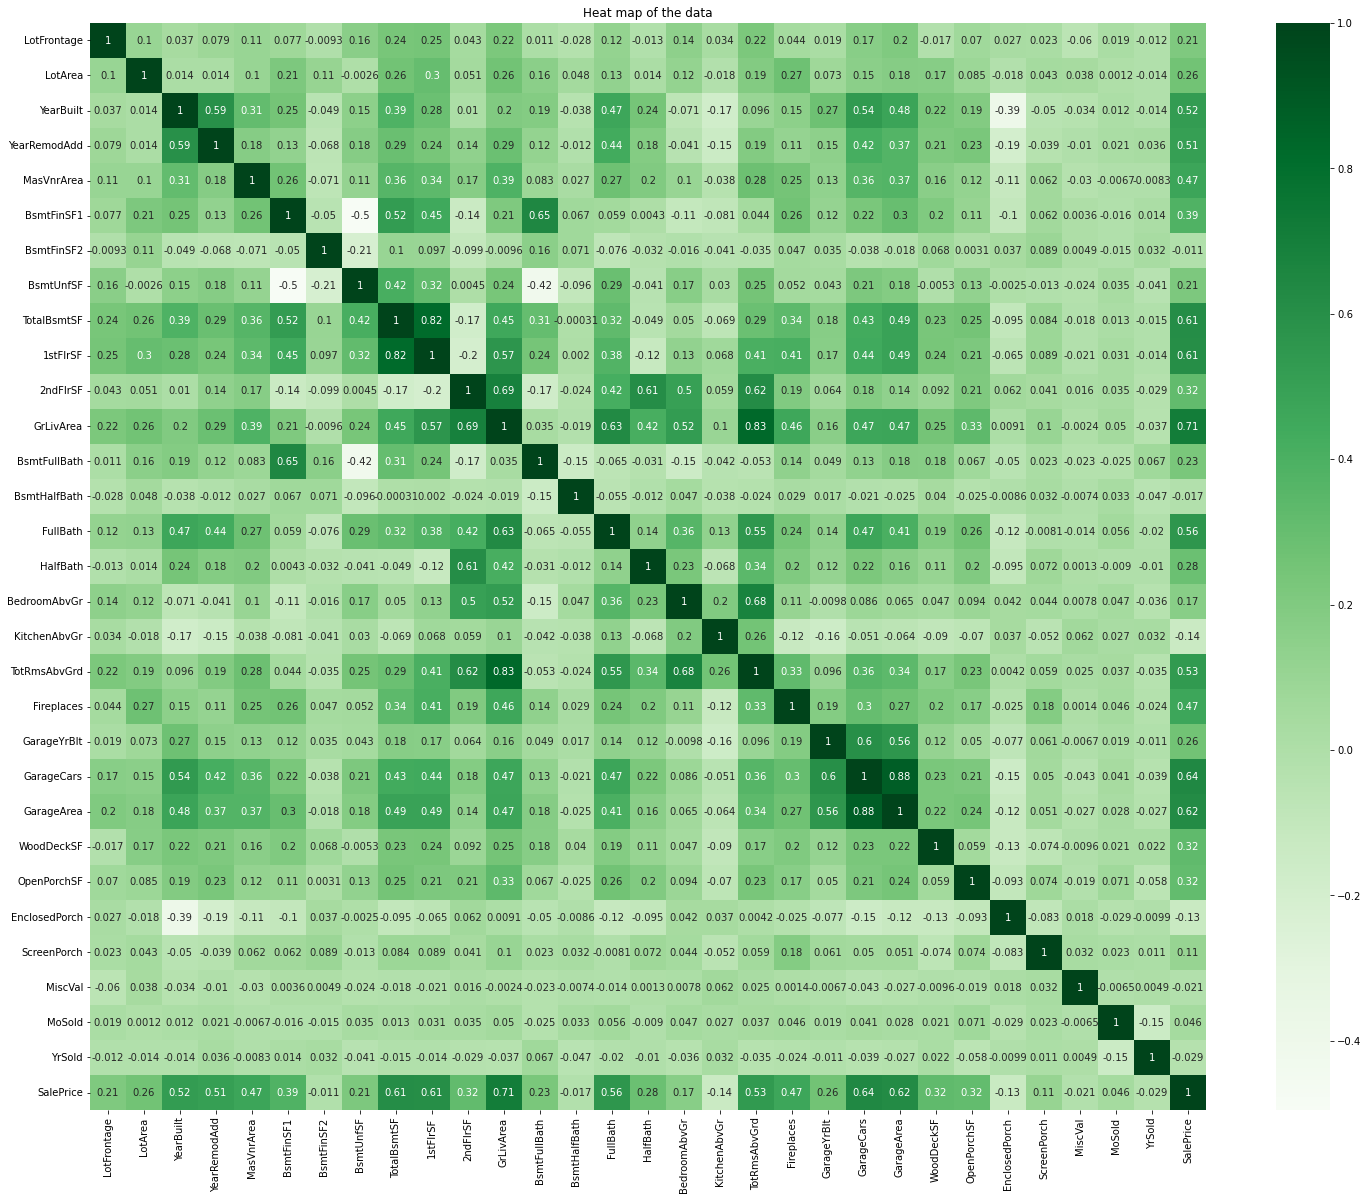

In [307]:
#Plotting a heatmap
plt.figure(figsize=(25,20))
sns.heatmap(houses_df.corr(), annot=True, cmap='Greens')
plt.title('Heat map of the data')
plt.show()

>SalePrice column has correlation with most of the variables, highest being with the Living area.

Checking for Outliers:

From the boxplots, we can see that the categorical variables have outliers, now checking for the outliers in numerical columns

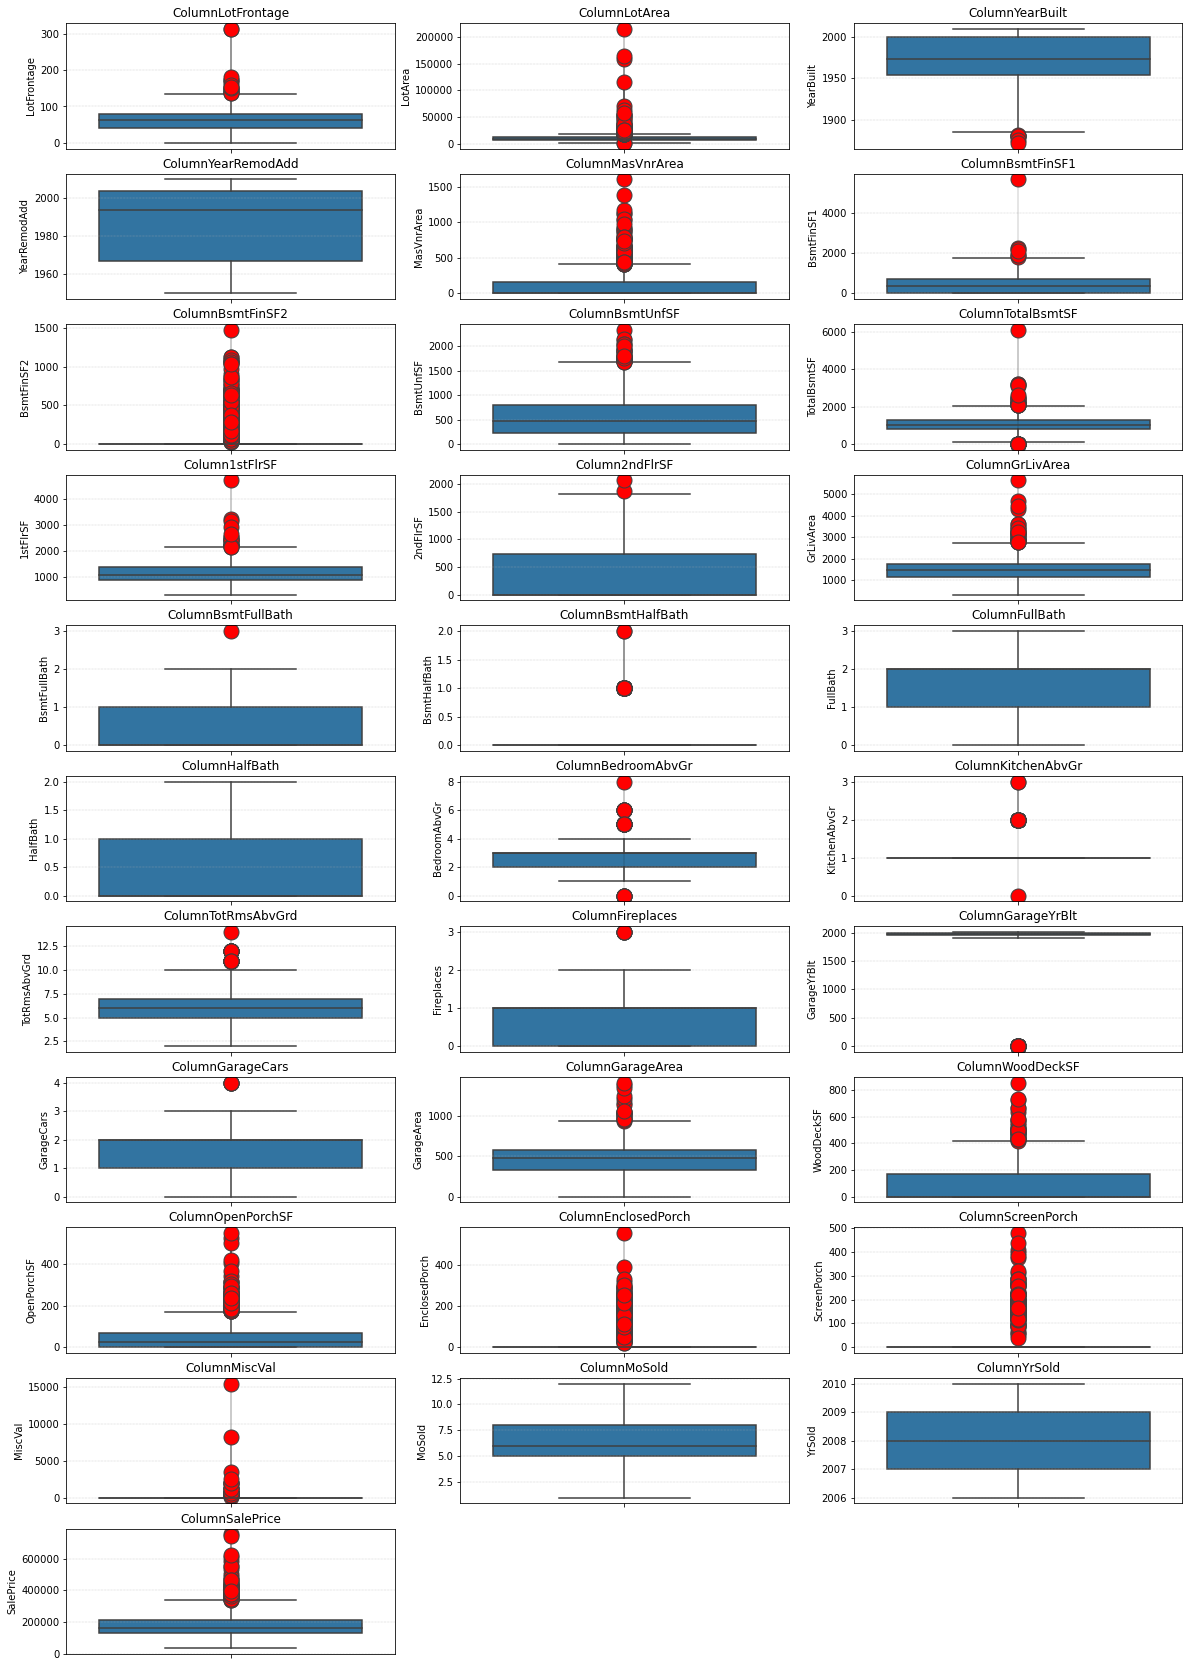

In [308]:
#Plotting the numeric variables
#Iterating over a dummy variable for all the subplots
i=1

plt.figure(2, figsize=(20,30))
for column in num_var:
    plt.subplot(11, 3, i)
    plt.grid(linestyle='-.', linewidth=0.3)
    flierprops = dict(marker='o',markerfacecolor='red', markersize=15, linewidth=0.2, linestyle='-')
    sns.boxplot(y= houses_df[column], flierprops=flierprops)
    plt.title('Column' + column)
    i+=1
       
plt.show()

Clearly, there are outliers in some columns, further steps to remove outliers.

In [309]:
# Columns involving years to be converted to their age for better interpretation

#YearBuilt
houses_df['Total_age']=houses_df['YrSold']-houses_df['YearBuilt']

#GarageYrBlt
houses_df['garage_Total_age'] = houses_df['YrSold'] - houses_df['GarageYrBlt']

#YearRemodAdd
houses_df['remodel_Total_age'] = houses_df['YrSold'] - houses_df['YearRemodAdd']

In [310]:
#Dropping the year columns
houses_df.drop(['GarageYrBlt','YearBuilt', 'YearRemodAdd'],axis=1,inplace=True)

## Outlier treatment:

In [311]:
outliers = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea', 'ScreenPorch', 'MiscVal', 'EnclosedPorch']

#Removing the outliers from the rows in each column
for column in outliers:
    Q1 = houses_df[column].quantile(.25)
    Q3 = houses_df[column].quantile(.99)
    IQR = Q3-Q1
    houses_df =  houses_df[(houses_df[column] >= (Q1-(1.5*IQR))) & (houses_df[column] <= (Q3+(1.5*IQR)))]

In [312]:
#Checking the shape of the data
houses_df.shape

(1447, 72)

## Dummy Variables:

In [313]:
#Visualising the categorical columns
cat_var1 = houses_df.select_dtypes(include=['object']).columns
cat_var1

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [314]:
# #Getting Dummy variables
dummies= pd.get_dummies(houses_df[cat_var1], drop_first = True)

#Adding them to our data
houses_df=pd.concat([houses_df, dummies],axis=1)

#Dropping the duplicate columns
houses_df= houses_df.drop(cat_var1,axis=1)
    
#Checking the shape of the data
houses_df.shape

(1447, 264)

In [315]:
#Splitting into x train and y train
np.random.seed(0)

#Train test split
df_train, df_test = train_test_split(houses_df, train_size = 0.8, test_size = 0.2, random_state = 100)

#y_train
y_train = df_train.pop('SalePrice')

#X_train
X_train = df_train

#y_test
y_test = df_test.pop('SalePrice')

#X_test
X_test = df_test

In [316]:
#Checking shape of the training data
X_train.shape

(1157, 263)

In [317]:
#Checking the first 5 columns
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,Total_age,garage_Total_age,remodel_Total_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Alley_No alley access,Alley_Paved,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_

## Scaling:

In [318]:
#Checking columns before scaling
X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,Total_age,garage_Total_age,remodel_Total_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Alley_No alley access,Alley_Paved,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_

In [319]:
#Initialising scaler
scaler = MinMaxScaler()

#Apply scaler to Numerical variables
numeric = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
           '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']


In [320]:
#Applying fit-transform on train data
X_train[numeric] = scaler.fit_transform(X_train[numeric])

In [321]:
#Applying only transform on test
X_test[numeric] = scaler.transform(X_test[numeric])

In [322]:
#Applying power transform on target variable
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

In [323]:
#Checking columns after scaling
X_train.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,Total_age,garage_Total_age,remodel_Total_age,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Floating Village,MSZoning_Residential High Density,MSZoning_Residential Low Density,MSZoning_Residential Medium Density,Alley_No alley access,Alley_Paved,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_

## Model Building:

In [324]:
#Initialising Linear regression 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [325]:
#Taking the top 25 columns given by RFE approach
rfe = RFE(lm, 25)
rfe = rfe.fit(X_train, y_train)

In [326]:
#Visualising RFE supported columns
rfe_supp = X_train.columns[rfe.support_]
rfe_supp

Index(['BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'KitchenAbvGr', 'GarageArea',
       'WoodDeckSF', 'MSZoning_Floating Village',
       'MSZoning_Residential High Density', 'MSZoning_Residential Low Density',
       'MSZoning_Residential Medium Density', 'Neighborhood_MeadowV',
       'OverallQual_Excellent', 'OverallQual_Fair', 'OverallQual_Good',
       'OverallQual_Poor', 'OverallQual_Very Excellent',
       'OverallQual_Very Good', 'OverallQual_Very Poor', 'OverallCond_Fair',
       'Exterior1st_BrkComm', 'Heating_Grav', 'HeatingQC_Po', 'Electrical_Mix',
       'Functional_Maj2', 'Functional_Sev'],
      dtype='object')

In [327]:
#Visualising columns un-supported by RFE
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=238)

In [328]:
#Considering only RFE supported columns in the model
X_train_lm = X_train[rfe_supp]

#Adding the constance
X_train_rfe = sm.add_constant(X_train_lm)

In [330]:
#Building a Linear model -1
lm_1 = sm.OLS(y_train,X_train_rfe).fit()

In [331]:
#Viewing the summary
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     287.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:28:32   Log-Likelihood:                 2071.6
No. Observations:                1157   AIC:                            -4091.
Df Residuals:                    1131   BIC:                            -3960.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   6.4400      0.016    401.800      0.000       6.409       6.471
BsmtFinSF1                              0.0616      0.007      8.369      0.000       0.047       0.076
TotalBsmtSF                             0.1116      0.013      8.699      0.000       0.086       0.137
GrLivArea                               0.3243      0.013     24.649      0.000       0.298       0.350
KitchenAbvGr                           -0.0474      0.006     -7.847      0.000      -0.059      -0.036
GarageArea                              0.1043      0.010     10.291      0.000       0.084       0.124
WoodDeckSF                              0.0458      0.009      5.046      0.000       0.028       0.064
MSZoning_Floating Village               0.1628      0.015     10.523      0.000       0.132       0.193
MSZoning_Residential High Density       0.1230      0.018      6.800      0.000       0.088       0.159
MSZoning_Residential Low Density        0.1455      0.014     10.146      0.000       0.117       0.174
MSZoning_Residential Medium Density     0.1096      0.015      7.492      0.000       0.081       0.138
Neighborhood_MeadowV                   -0.0429      0.011     -3.840      0.000      -0.065      -0.021
OverallQual_Excellent                   0.1071      0.009     12.555      0.000       0.090       0.124
OverallQual_Fair                       -0.0577      0.011     -5.117      0.000      -0.080      -0.036
OverallQual_Good                        0.0491      0.003     14.268      0.000       0.042       0.056
OverallQual_Poor                       -0.1276      0.030     -4.207      0.000      -0.187      -0.068
OverallQual_Very Excellent              0.0741      0.012      6.215      0.000       0.051       0.097
OverallQual_Very Good                   0.0742      0.005     15.433      0.000       0.065       0.084
OverallQual_Very Poor                  -0.1704      0.030     -5.763      0.000      -0.228      -0.112
OverallCond_Fair                       -0.0681      0.011     -6.473      0.000      -0.089      -0.047
Exterior1st_BrkComm                    -0.1761      0.042     -4.173      0.000      -0.259      -0.093
Heating_Grav                           -0.1168      0.019     -6.279      0.000      -0.153      -0.080
HeatingQC_Po                           -0.0466      0.041     -1.137      0.256      -0.127       0.034
Electrical_Mix                         -0.0704      0.047     -1.483      0.138      -0.164       0.023
Functional_Maj2                        -0.0778      0.024     -3.224      0.001      -0.125      -0.030
Functional_Sev                         -0.1177      0.041     -2.867      0.004      -0.198      -0.037
===================================================================

>R-squared = 86% , Two Columns have P-value > 0.05

In [332]:
# Reusable method for VIF
def vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [333]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
3,KitchenAbvGr,25.26
8,MSZoning_Residential Low Density,24.71
1,TotalBsmtSF,13.88
2,GrLivArea,10.62
4,GarageArea,9.83
9,MSZoning_Residential Medium Density,5.27
0,BsmtFinSF1,2.81
6,MSZoning_Floating Village,2.36
16,OverallQual_Very Good,1.89
5,WoodDeckSF,1.83


>Many columns have VIF>5 , Two columns have P value >0.05

In [334]:
#Dropping column with high P-value and re-building the model:
X_train_lm.drop(['HeatingQC_Po'], axis=1, inplace=True)

# Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Building a Linear model
lm_2 = sm.OLS(y_train,X_train_rfe).fit()

#Visualising the summary
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     299.8
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:02:34   Log-Likelihood:                 2070.9
No. Observations:                1157   AIC:                            -4092.
Df Residuals:                    1132   BIC:                            -3966.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [335]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
3,KitchenAbvGr,25.26
8,MSZoning_Residential Low Density,24.70
1,TotalBsmtSF,13.88
2,GrLivArea,10.61
4,GarageArea,9.83
9,MSZoning_Residential Medium Density,5.26
0,BsmtFinSF1,2.81
6,MSZoning_Floating Village,2.36
16,OverallQual_Very Good,1.89
5,WoodDeckSF,1.83


>1. R-Squared is the same, 86%
>2. 'Electrical_Mix' column has P-Value > 0.05
>3. 6 variables have VIF>5

In [336]:
#Dropping column with high P-value and re-building the model:
X_train_lm.drop(['Electrical_Mix'], axis=1, inplace=True)

# Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Building a Linear model
lm_3 = sm.OLS(y_train,X_train_rfe).fit()

#Visualising the summary
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     312.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:03:03   Log-Likelihood:                 2069.8
No. Observations:                1157   AIC:                            -4092.
Df Residuals:                    1133   BIC:                            -3970.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [337]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
3,KitchenAbvGr,25.26
8,MSZoning_Residential Low Density,24.69
1,TotalBsmtSF,13.88
2,GrLivArea,10.61
4,GarageArea,9.83
9,MSZoning_Residential Medium Density,5.26
0,BsmtFinSF1,2.81
6,MSZoning_Floating Village,2.36
16,OverallQual_Very Good,1.89
5,WoodDeckSF,1.83


>1. R-Squared = 86%
>2. All columns have P-Values < 0.05
>3. 6 columns have VIF >5

In [338]:
#Dropping column with high VIF and re-building the model:
X_train_lm.drop(['KitchenAbvGr'], axis=1, inplace=True)

# Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Building a Linear model
lm_4 = sm.OLS(y_train,X_train_rfe).fit()

#Visualising the summary
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     307.4
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:03:23   Log-Likelihood:                 2039.2
No. Observations:                1157   AIC:                            -4032.
Df Residuals:                    1134   BIC:                            -3916.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [339]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
1,TotalBsmtSF,13.81
7,MSZoning_Residential Low Density,11.81
2,GrLivArea,9.93
3,GarageArea,9.77
0,BsmtFinSF1,2.80
8,MSZoning_Residential Medium Density,2.61
4,WoodDeckSF,1.82
15,OverallQual_Very Good,1.81
12,OverallQual_Good,1.73
5,MSZoning_Floating Village,1.60


>1. R-Squared = 85%
>2. All columns have P-Values < 0.05
>3. 4 columns have VIF >5 - Dropping 'TotalBsmtSF'

In [340]:
#Dropping column with high VIF and re-building the model:
X_train_lm.drop(['TotalBsmtSF'], axis=1, inplace=True)

# Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Building a Linear model
lm_5 = sm.OLS(y_train,X_train_rfe).fit()

#Visualising the summary
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     300.5
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:04:02   Log-Likelihood:                 2004.7
No. Observations:                1157   AIC:                            -3965.
Df Residuals:                    1135   BIC:                            -3854.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [341]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
1,GrLivArea,9.68
2,GarageArea,9.49
6,MSZoning_Residential Low Density,8.93
0,BsmtFinSF1,2.42
7,MSZoning_Residential Medium Density,2.21
3,WoodDeckSF,1.82
14,OverallQual_Very Good,1.72
11,OverallQual_Good,1.71
4,MSZoning_Floating Village,1.51
13,OverallQual_Very Excellent,1.27


>1. R-Squared = 84.8%
>2. All columns have P-Values < 0.05
>3. 3 columns have VIF >5 - Not Dropping 'GrLivArea' and 'GarageArea' since it has higher coefficient, Instead dropping 'MSZoning_Residential Low Density'.

In [342]:
#Dropping column with high VIF and re-building the model:
X_train_lm.drop(['MSZoning_Residential Low Density'], axis=1, inplace=True)

# Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Building a Linear model
lm_6 = sm.OLS(y_train,X_train_rfe).fit()

#Visualising the summary
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     287.7
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:05:26   Log-Likelihood:                 1959.3
No. Observations:                1157   AIC:                            -3877.
Df Residuals:                    1136   BIC:                            -3771.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [343]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
2,GarageArea,7.19
1,GrLivArea,7.01
0,BsmtFinSF1,2.29
3,WoodDeckSF,1.81
10,OverallQual_Good,1.69
13,OverallQual_Very Good,1.56
6,MSZoning_Residential Medium Density,1.29
15,OverallCond_Fair,1.18
8,OverallQual_Excellent,1.16
12,OverallQual_Very Excellent,1.14


>1. R-Squared = 83.5%
>2. 'MSZoning_Floating Village' has P-Values > 0.05
>3. 2 columns have VIF >5

In [344]:
#Dropping column with high P-value and re-building the model:
X_train_lm.drop(['MSZoning_Floating Village'], axis=1, inplace=True)

# Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Building a Linear model
lm_7 = sm.OLS(y_train,X_train_rfe).fit()

#Visualising the summary
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     301.9
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:07:15   Log-Likelihood:                 1957.4
No. Observations:                1157   AIC:                            -3875.
Df Residuals:                    1137   BIC:                            -3774.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [345]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
2,GarageArea,7.10
1,GrLivArea,7.00
0,BsmtFinSF1,2.29
3,WoodDeckSF,1.80
9,OverallQual_Good,1.63
12,OverallQual_Very Good,1.55
5,MSZoning_Residential Medium Density,1.29
14,OverallCond_Fair,1.18
7,OverallQual_Excellent,1.16
11,OverallQual_Very Excellent,1.13


>1. R-Squared = 83.5%
>2. All columns have P-Values < 0.05
>3. GarageArea column has VIF >5 

In [346]:
#Dropping column with high P-value and re-building the model:
X_train_lm.drop(['GarageArea'], axis=1, inplace=True)

# Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Building a Linear model
lm_8 = sm.OLS(y_train,X_train_rfe).fit()

#Visualising the summary
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     287.6
Date:                Tue, 12 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:08:27   Log-Likelihood:                 1907.9
No. Observations:                1157   AIC:                            -3778.
Df Residuals:                    1138   BIC:                            -3682.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [347]:
#Computing VIF:
vif(X_train_lm)

,Features,VIF
1,GrLivArea,3.94
0,BsmtFinSF1,2.06
2,WoodDeckSF,1.78
8,OverallQual_Good,1.58
11,OverallQual_Very Good,1.47
4,MSZoning_Residential Medium Density,1.28
13,OverallCond_Fair,1.18
6,OverallQual_Excellent,1.15
10,OverallQual_Very Excellent,1.13
5,Neighborhood_MeadowV,1.12


>1. R-Squared = 82%
>2. All columns have P-Values < 0.05
>3. All the columns has VIF <5 

## Predictions:

In [348]:
#Making predictions on training data
y_train_pred = lm_8.predict(X_train_rfe)

In [349]:
#Converting it to a dataframe
y_train= pd.DataFrame(data=y_train)

Text(0.5, 0, 'Errors')

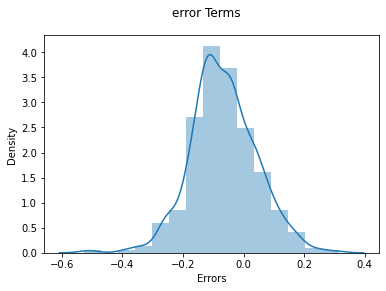

In [350]:
# Plotting a histogram of the error terms
fig = plt.figure()

sns.distplot((y_train - y_train_pred), bins = 15)
fig.suptitle('error Terms')
plt.xlabel('Errors')

>As we can see, it is not a perfect normal distribution, there is a distortion in the top

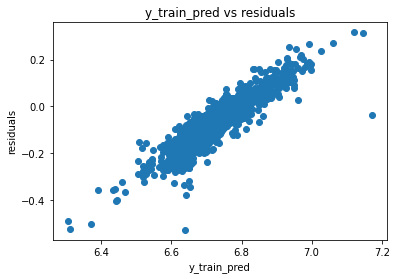

In [351]:
# Plotting Scatter plot on residuals
plt.figure()
y_diff = y_train-y_train_pred
plt.scatter(y_train_pred, y_diff[0])
plt.xlabel('y_train_pred')
plt.ylabel('residuals')
plt.title('y_train_pred vs residuals')
plt.show()

>There is a clear linear relationship between predictions and residuals, which is unwanted

## Ridge Regression:

In [352]:
# Taking the list of alpha values for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}

#Initialising Ridge
ridge = Ridge()

In [353]:
# Using RFE to find top 100 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=200)

# fitting the training data into rfe
rfe = rfe.fit(X_train,y_train)

# Plotting the RFE supported columns
col = X_train.columns[rfe.support_]

In [354]:
# Taking only RFE supported columns from X_train
X_train_rfe = X_train[col]

# Taking only RFE supported columns from X_test
X_test_rfe = X_test[col]

In [355]:
# Using cross validation
folds = 11

# Taking GridSerachCV for model selection
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)

# Fitting the model with training data
model_cv.fit(X_train_rfe, y_train) 

Fitting 11 folds for each of 26 candidates, totalling 286 fits


GridSearchCV(cv=11, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [356]:
# Taking the results from the model cv as dataframe
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]

# Getting mean test and train score with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

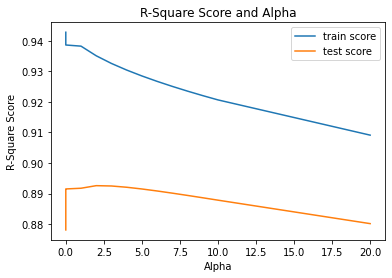

In [357]:
# plotting the graph for mean train and test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R-Square Score')
plt.title("R-Square Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [358]:
# Considering the optimum alpha value
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('Optimum alpha',alpha)

# Calculating the final ridge values
ridge_final = Ridge(alpha=alpha)

# Fitting the training data in ridge final
ridge_final.fit(X_train_rfe,y_train)

# getting the ridge coeficient
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)

Optimum alpha 2


In [359]:
print(f'R-Square value on the test data for optimum alpha {alpha} is {r2_score(y_test, y_test_pred)}')
print(f'Mean Square Error on the test data for optimum alpha {alpha} is {mean_squared_error(y_test, y_test_pred)}')
print(f'Mean Absolute Error on the test data for optimum alpha {alpha} is {mean_absolute_error(y_test, y_test_pred)}')

R-Square value on the test data for optimum alpha 2 is 0.8846165715637727
Mean Square Error on the test data for optimum alpha 2 is 0.0012456670254534336
Mean Absolute Error on the test data for optimum alpha 2 is 0.024246912507452565


> 1. R-Squared value = 88.4% on the test set
> 2. Optimum alpha value =3

In [360]:
#Checking VIF
vif = vif(X_train_rfe)

# Considering VIF>10 as unacceptable
high_vif = vif[vif['VIF']>10]

In [361]:
#Visualising columns with high VIF
high_vif

,Features,VIF
73,BldgType_Duplex,inf
172,GarageType_No Garage,inf
2,BsmtFinSF1,inf
3,BsmtFinSF2,inf
4,BsmtUnfSF,inf
5,TotalBsmtSF,inf
178,GarageQual_No Garage,inf
29,MSSubClass_DUPLEX - ALL STYLES AND AGES,inf
95,OverallCond_Very Poor,inf
183,GarageCond_No Garage,inf


There are features with high VIF, dropping these high VIF features

In [362]:
# X_train
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)

# X_test
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)

In [363]:
# Taking the list of alpha values for tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

##Initialising Ridge with random state
ridge = Ridge(random_state=100)

In [364]:
# Initializing the GridSearchCV 
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)

# Re-fitting the model
model_cv.fit(X_train_rfe2, y_train) 

Fitting 11 folds for each of 26 candidates, totalling 286 fits


GridSearchCV(cv=11, estimator=Ridge(random_state=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='r2', verbose=1)

In [365]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]

# Getting mean test and train score with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')


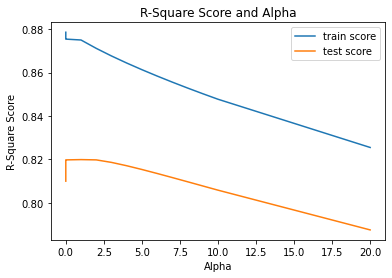

In [366]:
# plotting the graph for mean train and test scores
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R-Square Score')
plt.title("R-Square Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [367]:

# Considering the optimum alpha value
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)

# Calculating the final ridge values
ridge_final_2 = Ridge(alpha=alpha,random_state=100)

# Fitting the training data in ridge final
ridge_final_2.fit(X_train_rfe2,y_train)

# getting the ridge coeficient
ridge_coef_2 = ridge_final_2.coef_
y_test_pred = ridge_final_2.predict(X_test_rfe2)

The optimum alpha is 1


In [368]:
print(f'R-Square valueon the test dataset for optimum alpha {alpha} is {r2_score(y_test, y_test_pred)}')
print(f'Mean Square Error on the test dataset for optimum alpha {alpha} is {mean_squared_error(y_test, y_test_pred)}')
print(f'Mean Absolute Error on the test dataset for optimum alpha {alpha} is {mean_absolute_error(y_test, y_test_pred)}')

R-Square valueon the test dataset for optimum alpha 1 is 0.7823385007928765
Mean Square Error on the test dataset for optimum alpha 1 is 0.002349850025672697
Mean Absolute Error on the test dataset for optimum alpha 1 is 0.03414750816092278


>1. Optimum Alpha value = 1 
>2. R-Squared value = 78%

Calculating Ridge coefficients,

In [369]:
#Calculating the co-efficients
ridge_coef_2 = pd.DataFrame(np.atleast_2d(ridge_coef_2),columns=X_train_rfe2.columns)

# Taking the T value of the ridge cofficient
ridge_coef_2 = ridge_coef_2.T

In [370]:
ridge_coef_2.rename(columns={0: 'Ridge-Coefficients'},inplace=True)

# sorting the coefficients
ridge_coef_2.sort_values(by=['Ridge-Coefficients'], ascending=False,inplace=True)

# printing the head
ridge_coef_2.head(25)

,Ridge-Coefficients
LotArea,0.141524
OverallQual_Very Excellent,0.123265
OverallQual_Excellent,0.109521
OverallQual_Very Good,0.067721
MasVnrArea,0.060231
WoodDeckSF,0.048643
Neighborhood_Crawfor,0.047966
SaleType_ConLD,0.043713
Neighborhood_NridgHt,0.041086
Neighborhood_StoneBr,0.039153


## Lasso Regression:

In [371]:
# Taking the list of alpha values for tuning
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}

#Initialising Lasso
lasso = Lasso(random_state=100)

In [372]:
# Using Grid Search CV
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            

# fitting the train data
model_cv.fit(X_train_rfe2, y_train) 

# Taking the results from the model 
cv_results = pd.DataFrame(model_cv.cv_results_)

Fitting 11 folds for each of 11 candidates, totalling 121 fits


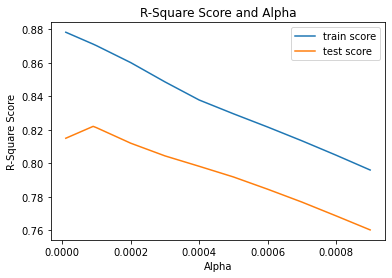

In [373]:
# plotting the mean train and test score
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R-Square Score')
plt.title("R-Square Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [374]:
# getting the optimal alpha value
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimal alpha is',alpha)

# Getting the lasso model with optimal alpha value
lasso_final = Lasso(alpha=alpha,random_state=100)

# Re-fitting the lasso model with training data
lasso_final.fit(X_train_rfe2,y_train)

# getting the lasso coefficient
lasso_coef = lasso_final.coef_

# predicting the sale price in test set
y_test_pred = lasso_final.predict(X_test_rfe2)

The optimal alpha is 9e-05


In [375]:
# Printing the required stats
print(f'R-Square value on test for alpha {alpha} = {r2_score(y_test, y_test_pred)}')
print(f'Mean Square Error on test for alpha {alpha} = {mean_squared_error(y_test, y_test_pred)}')
print(f'Mean Absolute Error on test for alpha {alpha} = {mean_absolute_error(y_test, y_test_pred)}')

R-Square value on test for alpha 9e-05 = 0.7939231014418842
Mean Square Error on test for alpha 9e-05 = 0.0022247839288588797
Mean Absolute Error on test for alpha 9e-05 = 0.03294366199540109


>Though R-squared value is 79%, the optimum alpha is very low(9e-05)

In [376]:
#Considering coefficients of the lasso regression
lasso_coeff = pd.DataFrame(np.atleast_2d(lasso_coef),columns=X_train_rfe2.columns)
lasso_coeff = lasso_coeff.T

In [377]:
lasso_coeff.rename(columns={0: "Lasso-Coefficient"},inplace=True)

# sorting the coefficient column values
lasso_coeff.sort_values(by=["Lasso-Coefficient"], ascending=False,inplace=True)

# printing the head
lasso_coeff.head(25)

,Lasso-Coefficient
LotArea,0.161795
OverallQual_Very Excellent,0.134849
OverallQual_Excellent,0.116976
OverallQual_Very Good,0.073607
MasVnrArea,0.056252
WoodDeckSF,0.046963
Neighborhood_Crawfor,0.043980
OverallQual_Good,0.037052
Neighborhood_NridgHt,0.036783
Neighborhood_NoRidge,0.033207


>As observed, the coefficients in both Ridge and Lasso are very similar

### The company wants to know:

In [378]:
#Considering the final Ridge model
ridge_final_2

Ridge(alpha=1, random_state=100)

>1. R-squared in Ridge = 0.7823385007928764
>2. Optimum value in Ridge = 1

In [379]:
#Considering the final Lasso model
lasso_final

Lasso(alpha=9e-05, random_state=100)

>1. R-squared in Lasso = 0.7939231014418842
>2. Optimum Value in Lasso = 9e-05

In [380]:
#To get variables are significant in predicting the price of a house, printing the lasso coefficients
lasso_coeff

,Lasso-Coefficient
LotArea,0.161795
OverallQual_Very Excellent,0.134849
OverallQual_Excellent,0.116976
OverallQual_Very Good,0.073607
MasVnrArea,0.056252
WoodDeckSF,0.046963
Neighborhood_Crawfor,0.043980
OverallQual_Good,0.037052
Neighborhood_NridgHt,0.036783
Neighborhood_NoRidge,0.033207


In [381]:
# How the variables describe the price of a house
final_expression = ''
for coeff, feature in zip(lasso_coeff['Lasso-Coefficient'], lasso_coeff.index):
    if coeff!=0:
        final_expression += f' {feature} * ({round(coeff, 4)}) +'
print('Expression to describe how the variables describe the price of a house: '+final_expression[:-1])

Expression to describe how the variables describe the price of a house:  LotArea * (0.1618) + OverallQual_Very Excellent * (0.1348) + OverallQual_Excellent * (0.117) + OverallQual_Very Good * (0.0736) + MasVnrArea * (0.0563) + WoodDeckSF * (0.047) + Neighborhood_Crawfor * (0.044) + OverallQual_Good * (0.0371) + Neighborhood_NridgHt * (0.0368) + Neighborhood_NoRidge * (0.0332) + Neighborhood_StoneBr * (0.0328) + SaleType_ConLD * (0.03) + Exterior1st_BrkFace * (0.0241) + FireplaceQu_TA * (0.0225) + Foundation_PConc * (0.0211) + MSSubClass_2-1/2 STORY ALL AGES * (0.021) + OpenPorchSF * (0.0209) + FireplaceQu_Gd * (0.0204) + HalfBath * (0.0202) + OverallCond_Excellent * (0.0194) + Neighborhood_ClearCr * (0.019) + BsmtExposure_Gd * (0.0165) + Neighborhood_Somerst * (0.0153) + MSSubClass_SPLIT FOYER * (0.0152) + OverallCond_Good * (0.0119) + Alley_Paved * (0.0118) + BsmtFullBath * (0.0116) + BsmtHalfBath * (0.0092) + Neighborhood_Timber * (0.0089) + Neighborhood_NWAmes * (0.0082) + Fireplace

From the expression,
>Lot Area effects the model most 16%, along with Excellent Overall Quality(13.5%)

Variables that positively effect the model:
    LotArea , OverallQual_Very Excellent, OverallQual_Excellent, OverallQual_Very Good, MasVnrArea, WoodDeckSF,
    Neighborhood_Crawfor, OverallQual_Good, Neighborhood_NridgHt, Neighborhood_NoRidge, Neighborhood_StoneBr, SaleType_ConLD, 
    Exterior1st_BrkFace, FireplaceQu_TA, Foundation_PConc, MSSubClass_2-1/2 STORY ALL AGES, OpenPorchSF, FireplaceQu_Gd,
    HalfBath, OverallCond_Excellent , Neighborhood_ClearCr , BsmtExposure_Gd , Neighborhood_Somerst, MSSubClass_SPLIT FOYER,
    OverallCond_Good , Alley_Paved , BsmtFullBath , BsmtHalfBath , Neighborhood_Timber , Neighborhood_NWAmes , FireplaceQu_Fa,
    OverallCond_Very Good, MSSubClass_1-STORY 1946 & NEWER ALL STYLES, RoofStyle_Mansard, LotShape_IR2, Exterior1st_CemntBd,
    Foundation_Stone , RoofStyle_Gambrel ,LotConfig_CulDSac , GarageFinish_RFn